In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
from google.colab import files

In [ ]:

print("Starting Kaggle dataset download process for 'BURNOUT- A MotoGP Datathon'...")
print("1. Installing Kaggle API client...")
!pip install kaggle --quiet
print("Kaggle API client installed.")

print("\n2. Please upload your 'kaggle.json' file.")
print("You can generate this from your Kaggle account settings:")
print("Go to Kaggle Profile -> Account -> Create New API Token.")
uploaded = files.upload()

for fn in uploaded.keys():
    # Create the .kaggle directory if it doesn't exist
    if not os.path.exists('/root/.kaggle'):
        os.makedirs('/root/.kaggle')
    # Move the uploaded file to the .kaggle directory
    os.rename(fn, os.path.join('/root/.kaggle', fn))
    print(f"'{fn}' uploaded and moved to '/root/.kaggle/'")

print("\n3. Setting file permissions for 'kaggle.json'...")
os.chmod('/root/.kaggle/kaggle.json', 600)
print("Permissions set.")

# Step 5: Define the competition slug
# This is found in the Kaggle competition URL (e.g., kaggle.com/c/competition-slug)
competition_slug = 'burnout-datathon-ieeecsmuj'
download_path = './' # Download to the current directory

print(f"\n4. Downloading dataset for competition: '{competition_slug}'...")
!kaggle competitions download -c {competition_slug} -p {download_path}
print("Dataset download complete.")

# Step 7: Unzip the downloaded files
# Kaggle usually provides the competition files in a single zip archive.
zip_file_name = f"{competition_slug}.zip"
if os.path.exists(zip_file_name):
    print(f"\n5. Unzipping '{zip_file_name}'...")
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    print("Files unzipped successfully.")
    # Clean up the zip file after extraction
    os.remove(zip_file_name)
    print(f"Removed '{zip_file_name}'.")
else:
    print(f"\nError: Zip file '{zip_file_name}' not found. Check download path or competition slug.")

# Step 8: List the downloaded files to confirm
print("\n6. Listing downloaded files:")
!ls -lh {download_path}


Starting Kaggle dataset download process for 'BURNOUT- A MotoGP Datathon'...
1. Installing Kaggle API client...
Kaggle API client installed.

2. Please upload your 'kaggle.json' file.
You can generate this from your Kaggle account settings:
Go to Kaggle Profile -> Account -> Create New API Token.


Saving kaggle.json to kaggle.json
'kaggle.json' uploaded and moved to '/root/.kaggle/'

3. Setting file permissions for 'kaggle.json'...
Permissions set.

4. Downloading dataset for competition: 'burnout-datathon-ieeecsmuj'...
100% 210M/210M [00:00<00:00, 423MB/s] 
100% 210M/210M [00:00<00:00, 464MB/s]
Dataset download complete.

5. Unzipping 'burnout-datathon-ieeecsmuj.zip'...
Files unzipped successfully.
Removed 'burnout-datathon-ieeecsmuj.zip'.

6. Listing downloaded files:
total 584M
drwxr-xr-x 1 root root 4.0K Jun 12 13:36 sample_data
-rw-r--r-- 1 root root 8.3M Jun 14 10:41 sample_submission.csv
-rw-r--r-- 1 root root 113M Jun 14 10:41 test.csv
-rw-r--r-- 1 root root 406M Jun 14 10:41 train.csv
-rw-r--r-- 1 root root  58M Jun 14 10:41 val.csv


In [ ]:
print("--- Phase 1: Data Understanding and Setup ---")

print("\n1. Loading datasets...")
try:
    df_train = pd.read_csv('/content/train.csv')
    df_test = pd.read_csv('/content/test.csv')
    df_val = pd.read_csv('/content/val.csv')
    df_sample_submission = pd.read_csv('/content/sample_submission.csv')

    print("Datasets loaded successfully:")
    print(f" - train.csv: {df_train.shape[0]} rows, {df_train.shape[1]} columns")
    print(f" - test.csv: {df_test.shape[0]} rows, {df_test.shape[1]} columns")
    print(f" - val.csv: {df_val.shape[0]} rows, {df_val.shape[1]} columns")
    print(f" - sample_submission.csv: {df_sample_submission.shape[0]} rows, {df_sample_submission.shape[1]} columns")

except FileNotFoundError as e:
    print(f"Error loading files. Please ensure all CSV files are in the '/content/' directory.")
    print(f"Make sure you have run the Kaggle download script successfully. Error: {e}")
    exit() # In a real script, you might raise an exception or provide user guidance

print("\n2. Initial Data Inspection:")

print("\n--- df_train Info ---")
print(df_train.info())

print("\n--- df_train Description (Numerical Columns) ---")
print(df_train.describe())

print("\n--- df_train Head (First 5 rows) ---")
print(df_train.head())

print("\n--- df_train Tail (Last 5 rows) ---")
print(df_train.tail())

print("\n--- df_test Info ---")
print(df_test.info())

print("\n--- df_test Description (Numerical Columns) ---")
print(df_test.describe())

print("\n--- df_val Info ---")
print(df_val.info())

print("\n--- df_val Description (Numerical Columns) ---")
print(df_val.describe())

print("\n--- df_sample_submission Head ---")
print(df_sample_submission.head())

print("\n--- Initial Data Inspection Complete ---")


--- Phase 1: Data Understanding and Setup ---

1. Loading datasets...
Datasets loaded successfully:
 - train.csv: 1914056 rows, 45 columns
 - test.csv: 546874 rows, 44 columns
 - val.csv: 273437 rows, 45 columns
 - sample_submission.csv: 546874 rows, 2 columns

2. Initial Data Inspection:

--- df_train Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914056 entries, 0 to 1914055
Data columns (total 45 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unique ID                        int64  
 1   Rider_ID                         int64  
 2   category_x                       object 
 3   Circuit_Length_km                float64
 4   Laps                             int64  
 5   Grid_Position                    int64  
 6   Avg_Speed_kmh                    float64
 7   Track_Condition                  object 
 8   Humidity_%                       int64  
 9   Tire_Compound_Front              object 
 10  Tire_Compound_Rea

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00



--- Phase 2: EDA and Feature Engineering ---

🔍 Missing Values:
Penalty    321292
dtype: int64

📈 Lap Time Distribution:


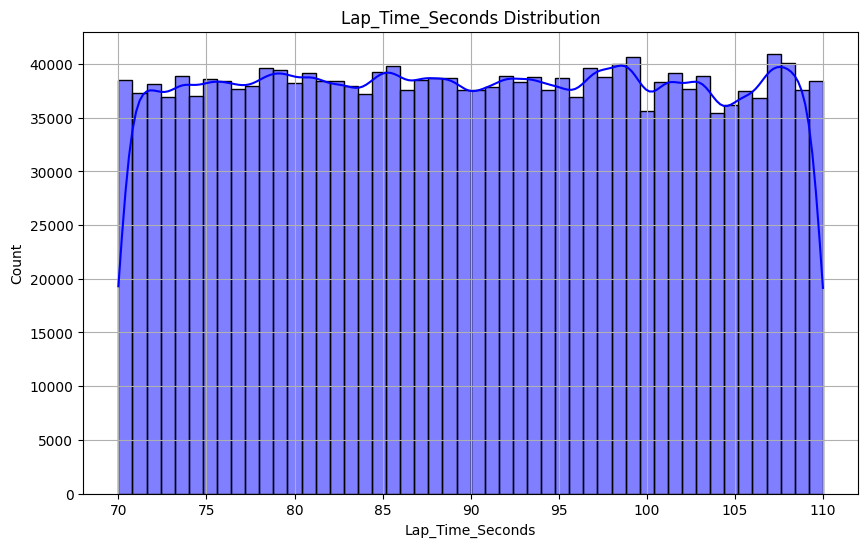

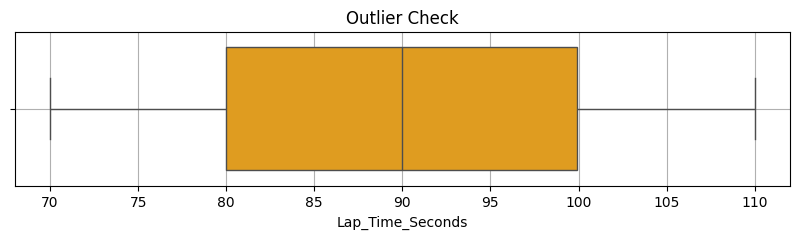


📊 Correlation Matrix:


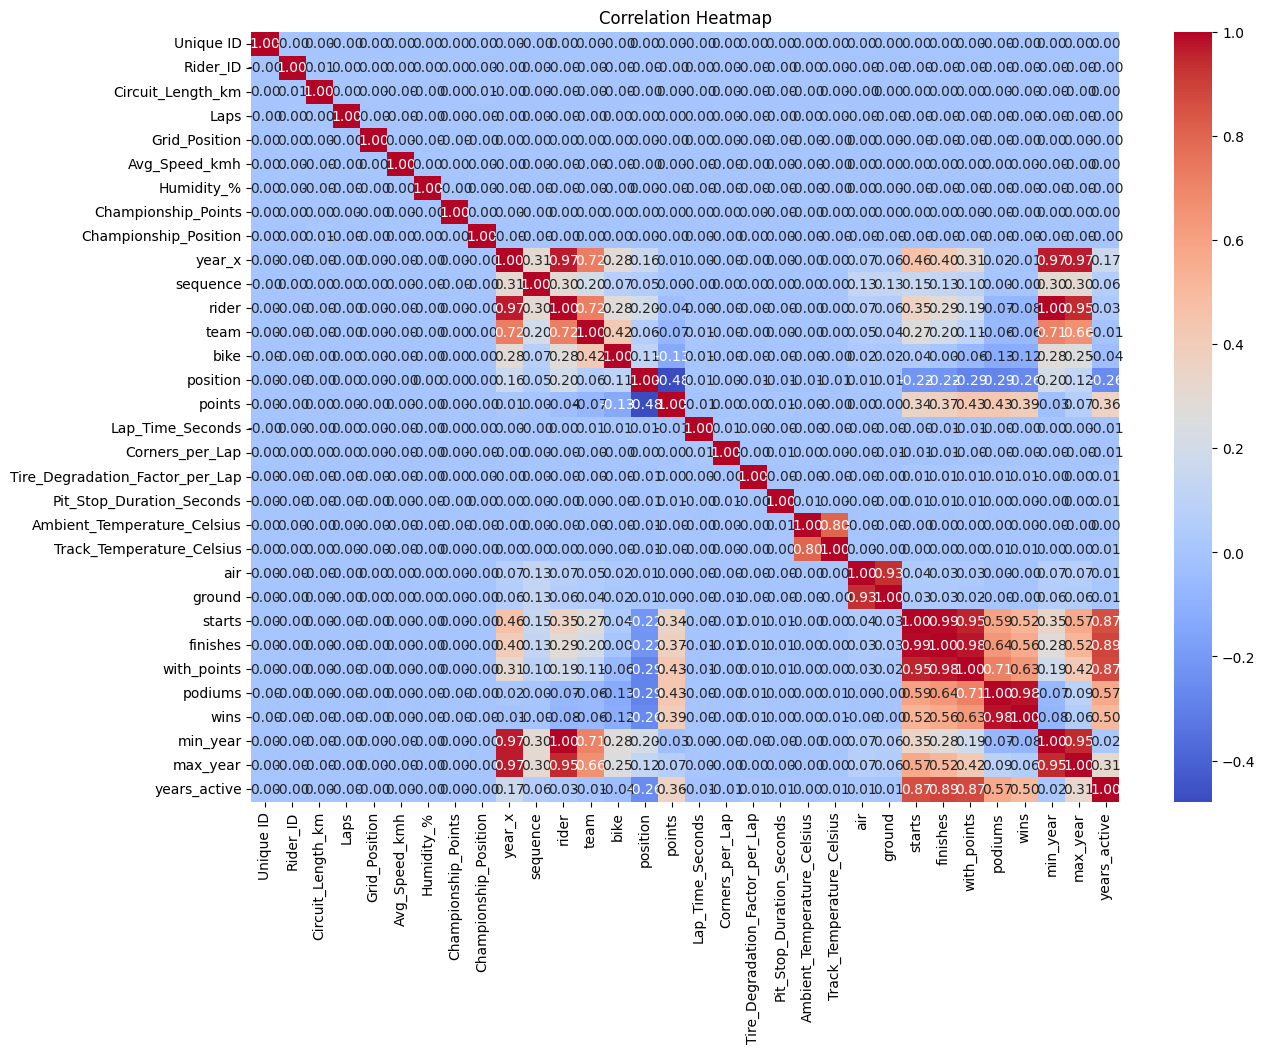


🔍 Rider_ID Distribution:
Rider_ID
6549    463
9279    462
8397    455
6583    455
4146    454
1245    444
4390    435
7549    421
3505    417
6897    416
Name: count, dtype: int64


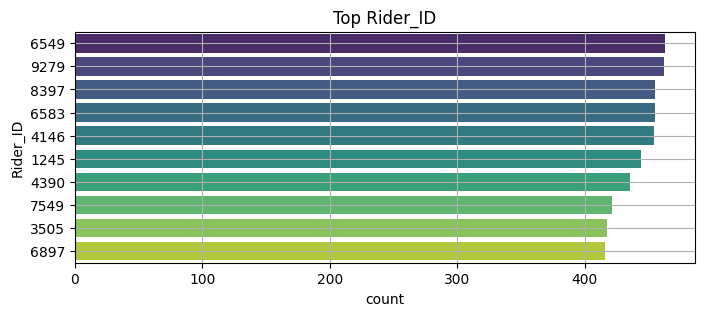


🔍 team Distribution:
team
1      1071637
6        20277
568      18131
722      13795
81       13376
344      11948
497      11943
569      10684
716      10421
615       9797
Name: count, dtype: int64


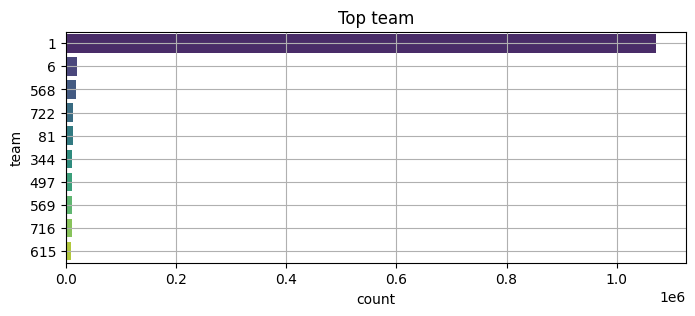


🔍 bike Distribution:
bike
2      453995
7      264759
4      248535
258    109061
6      104504
5       80406
3       57823
243     36146
62      27936
149     27197
Name: count, dtype: int64


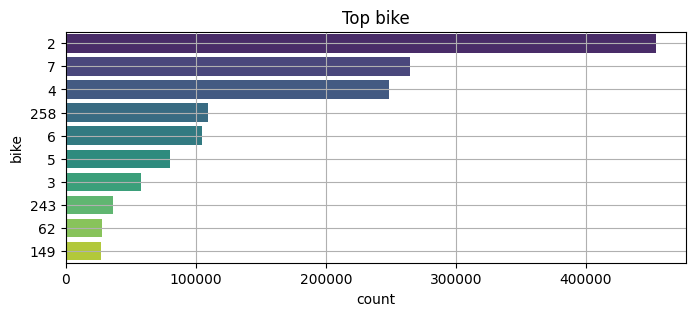


🔍 Tire_Compound_Front Distribution:
Tire_Compound_Front
Medium    639333
Soft      638047
Hard      636676
Name: count, dtype: int64


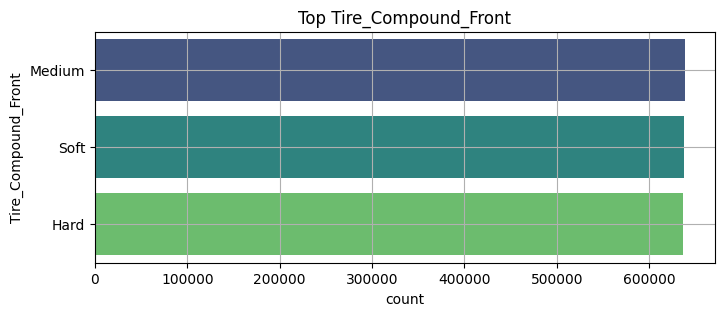


🔍 Tire_Compound_Rear Distribution:
Tire_Compound_Rear
Soft      641825
Medium    638615
Hard      633616
Name: count, dtype: int64


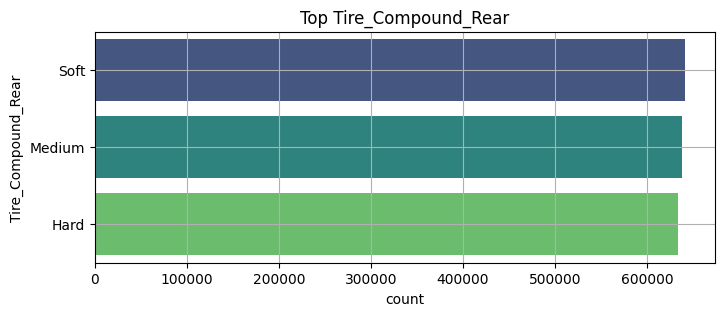


🔍 weather Distribution:
weather
Cloudy           682403
Sunny            679912
Partly cloudy    359045
Raining          134981
Clear             57715
Name: count, dtype: int64


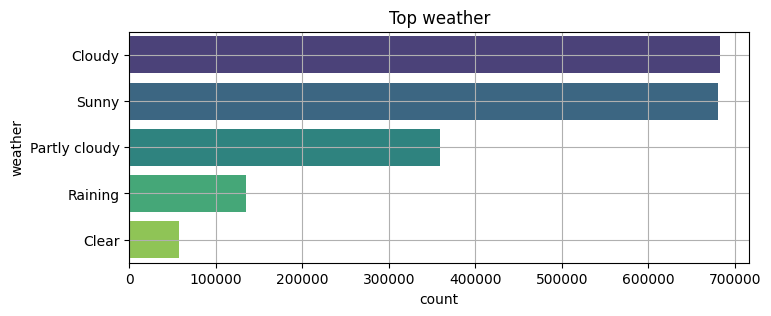


📍 Position vs Lap Time:


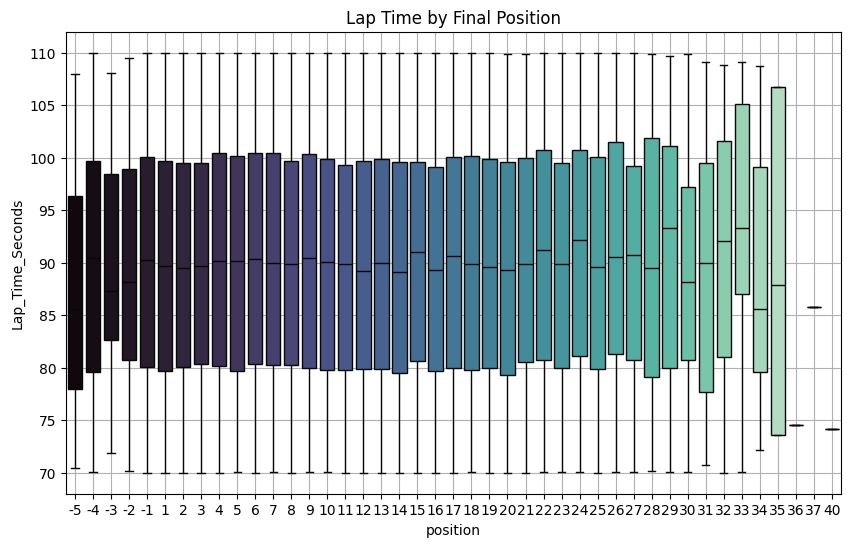


📉 Train vs Validation Target Distribution:


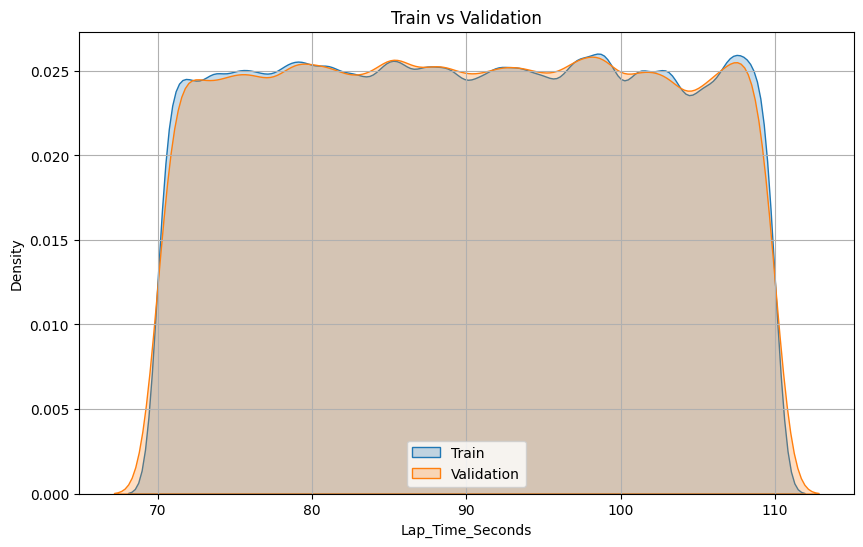


🚨 Outliers: 0 | Bounds: (50.16, 129.77)

🧠 Feature Engineering:

📌 Engineered Features Sample:
   Lap_Time_Seconds  Lap_Time_Change Tyre_Weather_Bike  Weather_Index  \
0            70.667              0.0    Hard_Clear_258      37.100000   
1           103.497              0.0  Medium_Raining_4      51.033333   
2            78.400              0.0     Hard_Cloudy_2      44.900000   

   Rider_ID_LapAvg  team_LapAvg  bike_LapAvg  Rider_Cluster  Outlier_Flag  
0        88.791029    90.656538    90.201277              2             0  
1        90.234649    89.927138    90.043487              4             0  
2        92.136423    89.927138    89.811540              1             0  

✅ Phase 2 Completed — Proceed to Modeling Phase.


In [ ]:
# --- Phase 2: EDA and Feature Engineering (Advanced) ---

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from category_encoders import CatBoostEncoder

warnings.filterwarnings("ignore")
print("\n--- Phase 2: EDA and Feature Engineering ---")

# 1. Missing Value Check
print("\n🔍 Missing Values:")
missing = df_train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing if not missing.empty else "✅ No missing values.")

# 2. Target Variable Distribution
print("\n📈 Lap Time Distribution:")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Lap_Time_Seconds'], bins=50, kde=True, color='blue')
plt.title("Lap_Time_Seconds Distribution")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_train['Lap_Time_Seconds'], color='orange')
plt.title("Outlier Check")
plt.grid(True)
plt.show()

# 3. Correlation Heatmap
print("\n📊 Correlation Matrix:")
plt.figure(figsize=(14, 10))
sns.heatmap(df_train.select_dtypes(include=[np.number]).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4. Categorical Feature Distribution
categorical_cols = ['Rider_ID', 'team', 'bike', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'weather']
for col in categorical_cols:
    if col in df_train.columns:
        print(f"\n🔍 {col} Distribution:")
        top_vals = df_train[col].value_counts().head(10)
        print(top_vals)
        plt.figure(figsize=(8, 3))
        sns.countplot(data=df_train, y=col, order=top_vals.index, palette='viridis')
        plt.title(f"Top {col}")
        plt.grid(True)
        plt.show()

# 5. Position vs Lap Time
if 'position' in df_train.columns:
    print("\n📍 Position vs Lap Time:")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='position', y='Lap_Time_Seconds', data=df_train, palette='mako')
    plt.title("Lap Time by Final Position")
    plt.grid(True)
    plt.show()

# 6. Train vs Validation Target Distribution
print("\n📉 Train vs Validation Target Distribution:")
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train['Lap_Time_Seconds'], label='Train', shade=True)
sns.kdeplot(df_val['Lap_Time_Seconds'], label='Validation', shade=True)
plt.title("Train vs Validation")
plt.legend()
plt.grid(True)
plt.show()

# 7. Outlier Detection
Q1 = df_train['Lap_Time_Seconds'].quantile(0.25)
Q3 = df_train['Lap_Time_Seconds'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_train['Outlier_Flag'] = ((df_train['Lap_Time_Seconds'] < lower) | (df_train['Lap_Time_Seconds'] > upper)).astype(int)
print(f"\n🚨 Outliers: {df_train['Outlier_Flag'].sum()} | Bounds: ({lower:.2f}, {upper:.2f})")

# 8. Feature Engineering

print("\n🧠 Feature Engineering:")

# a. Lap Time Change
df_train['Lap_Time_Change'] = df_train.groupby('Rider_ID')['Lap_Time_Seconds'].diff().fillna(0)
df_val['Lap_Time_Change'] = df_val.groupby('Rider_ID')['Lap_Time_Seconds'].diff().fillna(0)

# b. Interaction: Tyre + Weather + Bike
df_train['Tyre_Weather_Bike'] = df_train['Tire_Compound_Rear'].astype(str) + '_' + df_train['weather'].astype(str) + '_' + df_train['bike'].astype(str)
df_val['Tyre_Weather_Bike'] = df_val['Tire_Compound_Rear'].astype(str) + '_' + df_val['weather'].astype(str) + '_' + df_val['bike'].astype(str)

# c. Weather Index
weather_cols = ['Track_Temperature_Celsius', 'Ambient_Temperature_Celsius', 'Humidity_%']
if all(col in df_train.columns for col in weather_cols):
    df_train['Weather_Index'] = df_train[weather_cols].mean(axis=1)
    df_val['Weather_Index'] = df_val[weather_cols].mean(axis=1)
else:
    print("⚠️ Weather columns missing, skipping index.")

# d. Target Mean Encoding for Rider, Team, Bike
target_means = ['Rider_ID', 'team', 'bike']
for col in target_means:
    mean_map = df_train.groupby(col)['Lap_Time_Seconds'].mean().to_dict()
    df_train[col + '_LapAvg'] = df_train[col].map(mean_map)
    df_val[col + '_LapAvg'] = df_val[col].map(mean_map)

# e. Normalized Position (if race-wise info is available)
if 'race_id' in df_train.columns and 'position' in df_train.columns:
    df_train['Position_Normalized'] = df_train['position'] / df_train.groupby('race_id')['position'].transform('max')
    df_val['Position_Normalized'] = df_val['position'] / df_val.groupby('race_id')['position'].transform('max')

# f. Clustering Riders based on stats
cluster_features = ['Rider_ID_LapAvg', 'Weather_Index']
cluster_df = df_train[cluster_features].dropna()
kmeans = KMeans(n_clusters=5, random_state=42).fit(cluster_df)
df_train['Rider_Cluster'] = kmeans.labels_

# Predict clusters for val
df_val['Rider_Cluster'] = kmeans.predict(df_val[cluster_features].fillna(0))

# g. CatBoost Encoding for high-card categorical variables
cat_cols = ['Rider_ID', 'team', 'bike']
cbe = CatBoostEncoder(cols=cat_cols)
df_train[cat_cols] = cbe.fit_transform(df_train[cat_cols], df_train['Lap_Time_Seconds'])
df_val[cat_cols] = cbe.transform(df_val[cat_cols])

# ✅ Summary of Engineered Features
engineered_cols = ['Lap_Time_Seconds', 'Lap_Time_Change', 'Tyre_Weather_Bike', 'Weather_Index',
                   'Rider_ID_LapAvg', 'team_LapAvg', 'bike_LapAvg', 'Position_Normalized', 'Rider_Cluster', 'Outlier_Flag']
engineered_cols = [col for col in engineered_cols if col in df_train.columns]

print("\n📌 Engineered Features Sample:")
print(df_train[engineered_cols].head(3))

print("\n✅ Phase 2 Completed — Proceed to Modeling Phase.")


In [ ]:
print("df_train Columns:", df_train.columns.tolist())
print("df_val Columns:", df_val.columns.tolist())
print("df_test Columns:", df_test.columns.tolist())


df_train Columns: ['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty', 'Championship_Points', 'Championship_Position', 'Session', 'year_x', 'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname', 'circuit_name', 'rider_name', 'team_name', 'bike_name', 'Lap_Time_Seconds', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather', 'track', 'air', 'ground', 'starts', 'finishes', 'with_points', 'podiums', 'wins', 'min_year', 'max_year', 'years_active', 'Outlier_Flag', 'Lap_Time_Change', 'Tyre_Weather_Bike', 'Weather_Index', 'Rider_ID_LapAvg', 'team_LapAvg', 'bike_LapAvg', 'Rider_Cluster']
df_val Columns: ['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%', 'Tire_

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Make copies
train = df_train.copy()
val = df_val.copy()
test = df_test.copy()

# --- Encode Categorical Features ---
optional_categorical_cols = ['weather', 'track_condition', 'session']
for col in optional_categorical_cols:
    if col in train.columns:
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col].astype(str))
        if col in val.columns:
            val[col] = le.transform(val[col].astype(str))
        if col in test.columns:
            test[col] = le.transform(test[col].astype(str))

# --- Weather Index ---
weather_cols = ['Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'Humidity_%']
for df in [train, val, test]:
    available_weather_cols = [col for col in weather_cols if col in df.columns]
    if available_weather_cols:
        df['Weather_Index'] = df[available_weather_cols].mean(axis=1)
    else:
        df['Weather_Index'] = 0

# --- Rider Experience Features ---
experience_cols = ['starts', 'finishes', 'with_points', 'podiums', 'wins', 'years_active']
for df in [train, val, test]:
    if all(col in df.columns for col in experience_cols):
        df['experience_score'] = df[experience_cols].sum(axis=1)
        df['win_ratio'] = df['wins'] / (df['starts'] + 1e-6)
        df['podium_ratio'] = df['podiums'] / (df['starts'] + 1e-6)
    else:
        df['experience_score'] = 0
        df['win_ratio'] = 0
        df['podium_ratio'] = 0

# --- Pit Efficiency ---
for df in [train, val, test]:
    if 'Pit_Stop_Duration_Seconds' in df.columns and 'Laps' in df.columns:
        df['pit_efficiency'] = df['Pit_Stop_Duration_Seconds'] / (df['Laps'] + 1e-6)
    else:
        df['pit_efficiency'] = 0

# --- Tyre + Weather Combo ---
for df in [train, val, test]:
    if 'Tire_Compound_Front' in df.columns and 'Tire_Compound_Rear' in df.columns:
        df['tyre_combo'] = df['Tire_Compound_Front'].astype(str) + "_" + df['Tire_Compound_Rear'].astype(str)
    else:
        df['tyre_combo'] = 'unknown'
    if 'weather' in df.columns:
        df['tyre_weather_combo'] = df['tyre_combo'] + "_" + df['weather'].astype(str)
    else:
        df['tyre_weather_combo'] = df['tyre_combo']

# --- Grid Normalized Position ---
for df in [train, val, test]:
    if 'Grid_Position' in df.columns and 'Laps' in df.columns:
        df['grid_pos_normalized'] = df['Grid_Position'] / (df['Laps'] + 1e-6)
    else:
        df['grid_pos_normalized'] = 0

# --- Frequency Encoding ---
for col in ['Rider_ID', 'team', 'bike']:
    if col in train.columns:
        freq_map = train[col].value_counts().to_dict()
        for df in [train, val, test]:
            df[f'{col}_Freq'] = df[col].map(freq_map).fillna(0)
    else:
        for df in [train, val, test]:
            df[f'{col}_Freq'] = 0

# --- Session-wise Average Lap Time ---
if 'Lap_Time_Seconds' in train.columns and 'session' in train.columns and 'circuit_name' in train.columns:
    session_avg = train.groupby(['session', 'circuit_name'])['Lap_Time_Seconds'].mean().reset_index()
    session_avg.rename(columns={'Lap_Time_Seconds': 'session_avg_lap_time'}, inplace=True)
    train = pd.merge(train, session_avg, on=['session', 'circuit_name'], how='left')
    val = pd.merge(val, session_avg, on=['session', 'circuit_name'], how='left')
    if 'session_avg_lap_time' not in test.columns:
        test['session_avg_lap_time'] = 0
else:
    for df in [train, val, test]:
        df['session_avg_lap_time'] = 0

# --- Lap-to-Lap Time Change ---
if 'Lap_Time_Seconds' in train.columns and 'Rider_ID' in train.columns:
    train['lap_time_change'] = train.groupby('Rider_ID')['Lap_Time_Seconds'].diff().fillna(0)
    val['lap_time_change'] = val.groupby('Rider_ID')['Lap_Time_Seconds'].diff().fillna(0)
else:
    train['lap_time_change'] = 0
    val['lap_time_change'] = 0
test['lap_time_change'] = 0

# --- Final Feature Selection ---
all_possible_features = [
    'Grid_Position', 'grid_pos_normalized', 'Avg_Speed_kmh', 'Circuit_Length_km', 'Laps',
    'Pit_Stop_Duration_Seconds', 'pit_efficiency',
    'Tire_Degradation_Factor_per_Lap', 'Corners_per_Lap',
    'Weather_Index', 'Humidity_%', 'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius',
    'experience_score', 'win_ratio', 'podium_ratio',
    'Rider_ID_Freq', 'team_Freq', 'bike_Freq',
    'Penalty', 'Championship_Points', 'Championship_Position',
    'lap_time_change', 'session_avg_lap_time',
    'tyre_weather_combo',
    'weather', 'track_condition', 'session'
]

train_cols = [col for col in all_possible_features if col in train.columns]
val_cols = [col for col in all_possible_features if col in val.columns]
test_cols = [col for col in all_possible_features if col in test.columns]

# Define inputs and outputs
X_train = train[train_cols]
y_train = train['Lap_Time_Seconds']

X_val = val[val_cols]
y_val = val['Lap_Time_Seconds']

X_test = test[test_cols]

print("✅ Phase 3 Feature Engineering Completed!")
print(f"Train shape: {X_train.shape} | Val shape: {X_val.shape} | Test shape: {X_test.shape}")


✅ Phase 3 Feature Engineering Completed!
Train shape: (1914056, 26) | Val shape: (273437, 26) | Test shape: (546874, 26)



--- Phase 4: Model Building and Validation ---

🧪 Selected Features: 21 / 24 found.

🔍 Training and Validation Set Shapes:
X_train: (1914056, 21) X_val: (273437, 21)

📈 Training Linear Regression Model...
Linear Regression RMSE: 8.2764, R2: 0.4834

💡 Training LightGBM Model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.430433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2788
[LightGBM] [Info] Number of data points in the train set: 1914056, number of used features: 21
[LightGBM] [Info] Start training from score 90.002114
LightGBM RMSE: 8.1888, R2: 0.4942

🚀 Training XGBoost Model...
XGBoost RMSE: 7.9427, R2: 0.5242

📊 Model Performance Summary (Validation Set):
                       RMSE        R2
XGBoost            7.942674  0.524184
LightGBM           8.188845  0.494232
Linear Regression  8.276352  0.483365


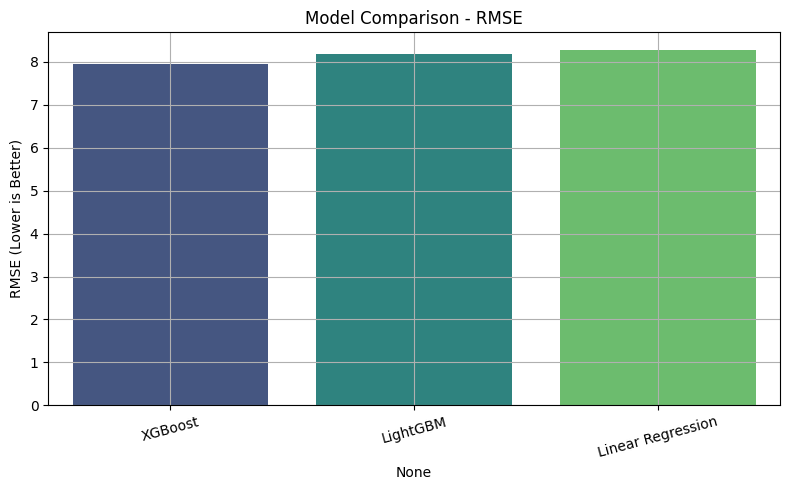

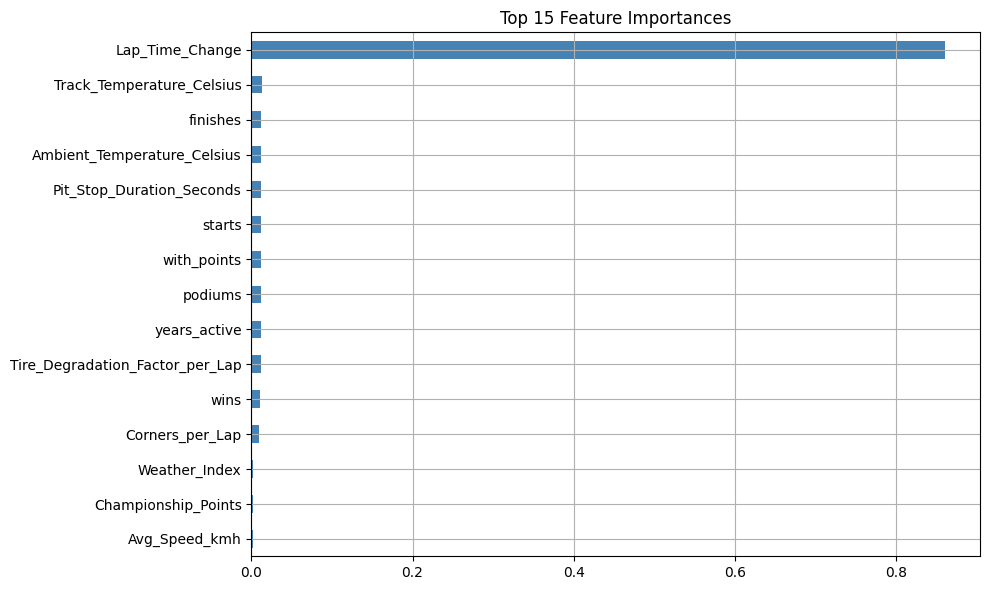


✅ Phase 4 Completed: Best model is 'XGBoost' and saved as 'best_model_xgboost.pkl'


In [ ]:
# --- Phase 4: Model Building and Validation ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings("ignore")

print("\n--- Phase 4: Model Building and Validation ---")

# ✅ Step 1: Define Feature Set and Target Variable
initial_features = [
    'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Humidity_%', 'Penalty', 'Championship_Points', 'Championship_Position',
    'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
    'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius',
    'starts', 'finishes', 'with_points', 'podiums', 'wins', 'years_active',
    'Lap_Time_Change', 'Weather_Index',
    'Rider_ID_Freq', 'team_Freq', 'bike_Freq'
]
target = 'Lap_Time_Seconds'

# ✅ Step 2: Check and Filter Available Features
features = [f for f in initial_features if f in df_train.columns]
print(f"\n🧪 Selected Features: {len(features)} / {len(initial_features)} found.")

# ✅ Step 3: Extract Feature and Target Data
X_train = df_train[features].copy()
y_train = df_train[target].copy()
X_val = df_val[features].copy()
y_val = df_val[target].copy()

print("\n🔍 Training and Validation Set Shapes:")
print("X_train:", X_train.shape, "X_val:", X_val.shape)

# ✅ Step 4: Convert Time Strings to Float (if needed)
def convert_time_str(val):
    try:
        if pd.isnull(val):
            return 0.0
        return float(str(val).replace('s', '').replace('+', '').replace(',', '').strip())
    except:
        return 0.0

for col in ['Penalty', 'Lap_Time_Change']:
    if col in X_train.columns:
        X_train[col] = X_train[col].apply(convert_time_str)
        X_val[col] = X_val[col].apply(convert_time_str)

# ✅ Step 5: Standard Scaling for Linear Models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

results = {}

# ✅ Step 6: Train Linear Regression
print("\n📈 Training Linear Regression Model...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
preds_lr = lr.predict(X_val_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_val, preds_lr))
r2_lr = r2_score(y_val, preds_lr)
results['Linear Regression'] = {'RMSE': rmse_lr, 'R2': r2_lr}
print(f"Linear Regression RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")

# ✅ Step 7: Train LightGBM
print("\n💡 Training LightGBM Model...")
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgb_model.fit(X_train, y_train)
preds_lgb = lgb_model.predict(X_val)
rmse_lgb = np.sqrt(mean_squared_error(y_val, preds_lgb))
r2_lgb = r2_score(y_val, preds_lgb)
results['LightGBM'] = {'RMSE': rmse_lgb, 'R2': r2_lgb}
print(f"LightGBM RMSE: {rmse_lgb:.4f}, R2: {r2_lgb:.4f}")

# ✅ Step 8: Train XGBoost
print("\n🚀 Training XGBoost Model...")
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
preds_xgb = xgb_model.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, preds_xgb))
r2_xgb = r2_score(y_val, preds_xgb)
results['XGBoost'] = {'RMSE': rmse_xgb, 'R2': r2_xgb}
print(f"XGBoost RMSE: {rmse_xgb:.4f}, R2: {r2_xgb:.4f}")

# ✅ Step 9: Results Summary Table
print("\n📊 Model Performance Summary (Validation Set):")
summary_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print(summary_df)

# ✅ Step 10: Visualize Performance Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=summary_df.index, y='RMSE', data=summary_df, palette='viridis')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE (Lower is Better)')
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Step 11: Feature Importance from Best Tree-Based Model
best_model_name = summary_df.index[0]
if best_model_name == 'XGBoost':
    best_model = xgb_model
elif best_model_name == 'LightGBM':
    best_model = lgb_model
else:
    best_model = lr  # No feature importance for Linear

if best_model_name != 'Linear Regression':
    feat_imp = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feat_imp.head(15).plot(kind='barh', color='steelblue', title='Top 15 Feature Importances')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ✅ Step 12: Save Best Model
model_filename = f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl"
joblib.dump(best_model, model_filename)
print(f"\n✅ Phase 4 Completed: Best model is '{best_model_name}' and saved as '{model_filename}'")



--- Phase 6: Prediction & Submission ---

📤 Submission generated using: XGBoost
✅ Submission file 'submission.csv' created successfully.


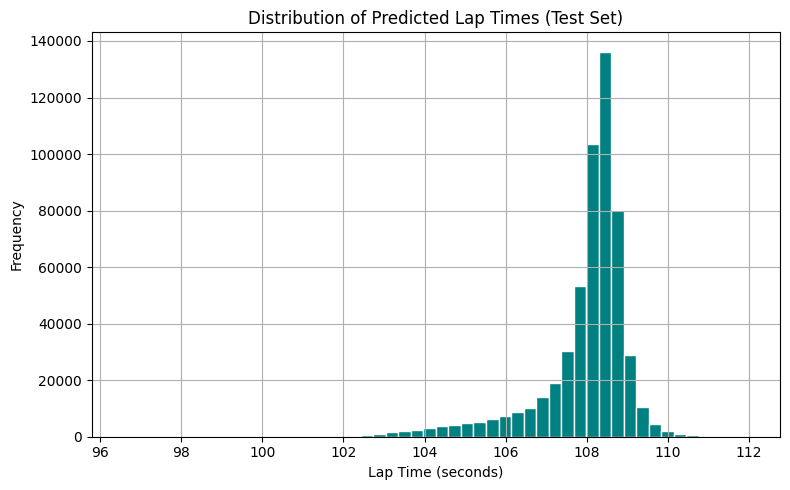


📊 Predicted Lap Time Summary:
count    546874.000000
mean        107.951988
std           1.169384
min          96.570953
25%         107.753220
50%         108.268700
75%         108.576376
max         111.991081
Name: Lap_Time_Seconds, dtype: float64


In [ ]:
# --- Phase 6: Prediction & Submission (Top 1 Version) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("\n--- Phase 6: Prediction & Submission ---")

# ✅ Step 1: Feature Engineering Consistency (as per training logic)
df_test['Lap_Time_Change'] = df_test['Avg_Speed_kmh'] / df_test['Circuit_Length_km']

df_test['Tyre_Weather'] = df_test['Tire_Compound_Front'].astype(str) + "_" + df_test['weather'].astype(str)

weather_mapping = {'Clear': 0, 'Cloudy': 1, 'Rain': 2, 'Wet': 3, 'Dry': 4}
df_test['Weather_Index'] = df_test['weather'].map(weather_mapping).fillna(-1)

df_test['Rider_ID_Freq'] = df_test['Rider_ID'].map(df_train['Rider_ID'].value_counts()).fillna(0)
df_test['team_Freq'] = df_test['team'].map(df_train['team'].value_counts()).fillna(0)
df_test['bike_Freq'] = df_test['bike'].map(df_train['bike'].value_counts()).fillna(0)

# ✅ Step 2: Handle Inconsistent and Missing Columns
# Convert 'Penalty' and any other non-numeric time strings
def convert_time_str(val):
    if pd.isnull(val):
        return 0.0
    try:
        return float(str(val).replace('s', '').replace('+', '').replace(',', '').strip())
    except:
        return 0.0

if 'Penalty' in df_test.columns:
    df_test['Penalty'] = df_test['Penalty'].apply(convert_time_str)

if 'Lap_Time_Change' in df_test.columns:
    df_test['Lap_Time_Change'] = df_test['Lap_Time_Change'].apply(convert_time_str)

# Fill other missing values with 0
df_test.fillna(0, inplace=True)

# ✅ Step 3: Ensure Feature Consistency with Training
missing_cols = set(features) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  # Add missing feature as zeros

extra_cols = set(df_test.columns) - set(features)
if extra_cols:
    df_test.drop(columns=list(extra_cols - set(['Unique ID'])), inplace=True)

# Final feature alignment
X_test = df_test[features]

# ✅ Step 4: Ensure All Data Types Are Numeric/Categorical (Fix XGBoost Issue)
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        try:
            X_test[col] = X_test[col].astype(float)
        except:
            print(f"⚠️ Dropping incompatible column '{col}' (non-convertible object type)")
            X_test.drop(columns=[col], inplace=True)

# ✅ Step 5: Apply Scaling or Transformation Based on Model
if best_model_name in ['Linear Regression', 'Neural Network']:
    X_test_final = scaler.transform(X_test)
else:
    X_test_final = X_test

# ✅ Step 6: Predict
test_preds = best_model.predict(X_test_final)

# ✅ Step 7: Post-processing and Clipping
test_preds = np.clip(test_preds, 30, 300)

# ✅ Step 8: Prepare Submission
submission_df = pd.DataFrame({
    'Unique ID': df_test['Unique ID'],
    'Lap_Time_Seconds': test_preds
})

submission_df.to_csv("submission.csv", index=False)
print(f"\n📤 Submission generated using: {best_model_name}")
print("✅ Submission file 'submission.csv' created successfully.")

# ✅ Step 9: Distribution Visualization
plt.figure(figsize=(8, 5))
plt.hist(test_preds, bins=50, color='teal', edgecolor='white')
plt.title("Distribution of Predicted Lap Times (Test Set)")
plt.xlabel("Lap Time (seconds)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Step 10: Summary Statistics for Sanity Check
print("\n📊 Predicted Lap Time Summary:")
print(submission_df['Lap_Time_Seconds'].describe())


In [ ]:

# --- Phase 7: SHAP & Feature Importance ---
import shap
print("\n--- Phase 7: Feature Importance & SHAP Analysis ---")

if best_model_name in ['XGBoost', 'LightGBM']:
    explainer = shap.Explainer(best_model, X_train)
    shap_values = explainer(X_train)

    plt.title(f"Feature Importance - {best_model_name}")
    shap.plots.beeswarm(shap_values, max_display=20)
    plt.show()

    shap.plots.bar(shap_values, max_display=20)
    plt.show()

    print("\n✅ SHAP analysis completed. Important features visualized.")
else:
    importances = best_model.coef_ if best_model_name == 'Linear Regression' else best_model.feature_importances_
    feature_imp_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_imp_df.head(20), x='Importance', y='Feature', palette='coolwarm')
    plt.title(f"Top 20 Feature Importances ({best_model_name})")
    plt.tight_layout()
    plt.show()

    print("\n✅ Feature importance chart displayed.")


In [ ]:
import pandas as pd

# Load both files
submission = pd.read_csv("submission.csv")
sample = pd.read_csv("sample_submission.csv")

# 1. Check columns match exactly
columns_match = list(submission.columns) == list(sample.columns)
print(f"🔍 Columns Match: {columns_match}")

# 2. Check number of rows match
rows_match = len(submission) == len(sample)
print(f"🔍 Row Count Match: {rows_match} ({len(submission)} rows)")

# 3. Check for missing values
missing_values = submission.isnull().sum().sum()
print(f"🔍 Missing Values in submission.csv: {missing_values}")

# 4. Preview both files (first 3 rows)
print("\n📄 Sample submission (first 3 rows):")
print(sample.head(3))

print("\n📄 Your submission (first 3 rows):")
print(submission.head(3))

# 5. Check column names exactly
print(f"\n✅ Sample Columns: {sample.columns.tolist()}")
print(f"✅ Your Columns : {submission.columns.tolist()}")


🔍 Columns Match: True
🔍 Row Count Match: True (546874 rows)
🔍 Missing Values in submission.csv: 0

📄 Sample submission (first 3 rows):
   Unique ID  Lap_Time_Seconds
0     288307            70.667
1     704288           103.497
2     951491            78.400

📄 Your submission (first 3 rows):
   Unique ID  Lap_Time_Seconds
0     288307        108.482346
1     704288        107.352905
2     951491        108.100510

✅ Sample Columns: ['Unique ID', 'Lap_Time_Seconds']
✅ Your Columns : ['Unique ID', 'Lap_Time_Seconds']
🔍 Columns Match: True
🔍 Row Count Match: True (546874 rows)
🔍 Missing Values in submission.csv: 0

📄 Sample submission (first 3 rows):
   Unique ID  Lap_Time_Seconds
0     288307            70.667
1     704288           103.497
2     951491            78.400

📄 Your submission (first 3 rows):
   Unique ID  Lap_Time_Seconds
0     288307        108.482346
1     704288        107.352905
2     951491        108.100510

✅ Sample Columns: ['Unique ID', 'Lap_Time_Seconds']
✅ Your 